In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('car_price.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [229]:
df.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,3.756098,2.614634,1.326829,98.756585,174.049268,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,1.989932,0.859081,0.556171,6.021776,12.337289,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,86.600000,141.100000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,2.000000,2.000000,1.000000,94.500000,166.300000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,2.000000,3.000000,1.000000,97.000000,173.200000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,6.000000,3.000000,2.000000,102.400000,183.100000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,6.000000,4.000000,2.000000,120.900000,208.100000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [99]:
n = df.columns[27]
df.drop(n, axis=1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,low_risk_cars
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,NaN
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,NaN
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,NaN
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,NaN
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo 145e (sw)
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo 144ea
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo 244dl
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo 246


In [227]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Low risk price cars 

In [103]:
low_risk_cars = df['CarName'][df['symboling']<=0]
low_risk_cars
df['low_risk_cars']=low_risk_cars
new_low_risk = df['low_risk_cars'].dropna(axis=0)

High Risk Cars

In [104]:
high_risk_cars = df['CarName'][df['symboling']>=0]
high_risk_cars
df['high_risk_cars']=high_risk_cars
new_high_risk = df['high_risk_cars'].dropna(axis=0)

In [116]:
df[['Low_risk_cars','High_risk_cars']].fillna(0)

,Low_risk_cars,High_risk_cars
0,0,alfa-romero giulia
1,0,alfa-romero stelvio
2,0,alfa-romero Quadrifoglio
3,0,audi 100 ls
4,0,audi 100ls
...,...,...
200,volvo 145e (sw),0
201,volvo 144ea,0
202,volvo 244dl,0
203,volvo 246,0


Convert All String Values in Int Values

In [56]:
old_carname = np.unique(df['CarName'])
num_carname = []
carname = np.arange(len(old_carname))

for i in range(len(old_carname)):
    num_carname.append(i)
new_carname = df.replace(old_carname,num_carname, inplace=True)

In [73]:
old_fueltype = np.unique(df['fueltype'])
num_fueltype = []
carname = np.arange(len(old_fueltype))

for i in range(len(old_fueltype)):
    num_fueltype.append(i)
new_fueltype = df.replace(old_fueltype,num_fueltype, inplace=True)

In [59]:
old_aspiration = np.unique(df['aspiration'])
num_aspiration = []
apiration = np.arange(len(old_aspiration))

for i in range(len(old_aspiration)):
    num_aspiration.append(i)
new_aspiration = df.replace(old_aspiration,num_aspiration, inplace=True)

In [63]:
old_carbody = np.unique(df['carbody'])
num_carbody = []
carbody = np.arange(len(old_carbody))

for i in range(len(old_carbody)):
    num_carbody.append(i)
new_carbody = df.replace(old_carbody,num_carbody, inplace=True)

In [66]:
old_drivewheel = np.unique(df['drivewheel'])
num_drivewheel = []
drivewheel = np.arange(len(old_drivewheel))

for i in range(len(old_drivewheel)):
    num_drivewheel.append(i)
new_drivewheel = df.replace(old_drivewheel,num_drivewheel, inplace = True)

In [68]:
old_enginetype = np.unique(df['enginetype'])
num_enginetype = []
enginetype = np.arange(len(old_enginetype))

for i in range(len(old_enginetype)):
    num_enginetype.append(i)
new_enginetype = df.replace(old_enginetype,num_enginetype, inplace=True)

In [78]:
old_cylindernumber = np.unique(df['cylindernumber'])
num_cylindernumber = []
cylindernumber = np.arange(len(old_cylindernumber))

for i in range(len(old_cylindernumber)):
    num_cylindernumber.append(i)
new_cylendernumber = df.replace(old_cylindernumber,num_cylindernumber, inplace = True)

In [80]:
old_fuelsystem = np.unique(df['fuelsystem'])
num_fuelsystem = []
fuelsystem = np.arange(len(old_fuelsystem))

for i in range(len(old_fuelsystem)):
    num_fuelsystem.append(i)
new_fuelsystem = df.replace(old_fuelsystem,num_fuelsystem, inplace = True)

New Data Frame With Int Values

In [81]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,6,0,2,front,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,6,0,2,front,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,6,2,2,front,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,2,3,1,front,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,2,3,0,front,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,2,3,2,front,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,2,3,2,front,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,2,3,2,front,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,2,3,2,front,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


Take The X and Y Values

In [7]:
new_x = df[['CarName','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','wheelbase','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','symboling','carlength','carwidth','carheight','curbweight']]
new_y = df['price']
x = new_x
y = np.reshape(df['price'],(-1,1))

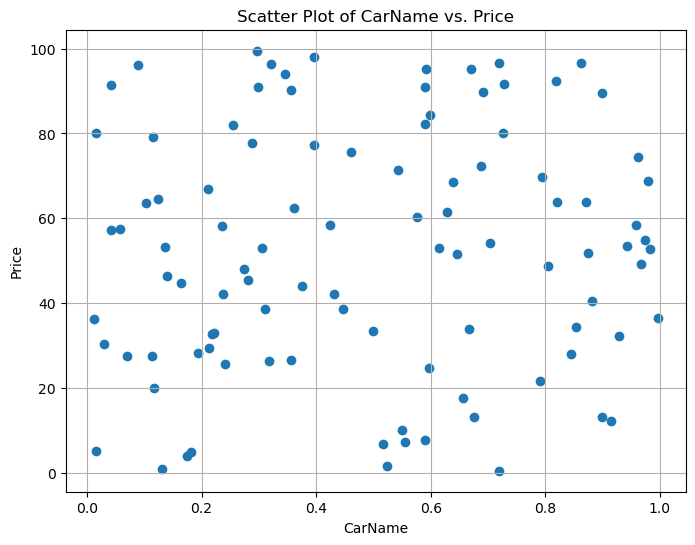

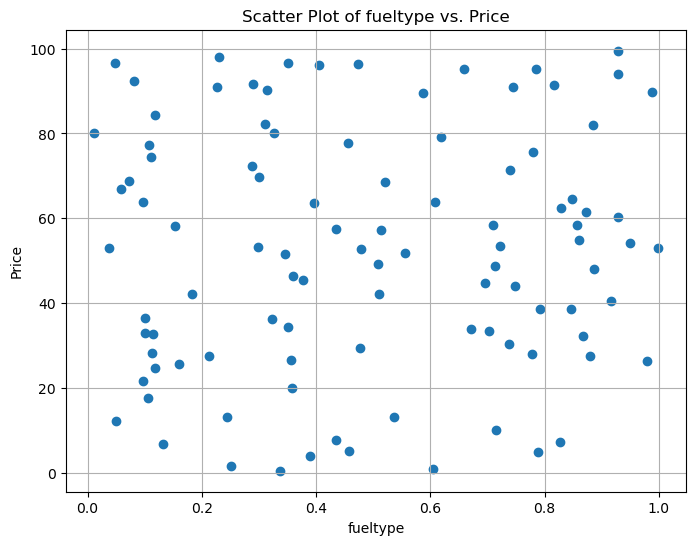

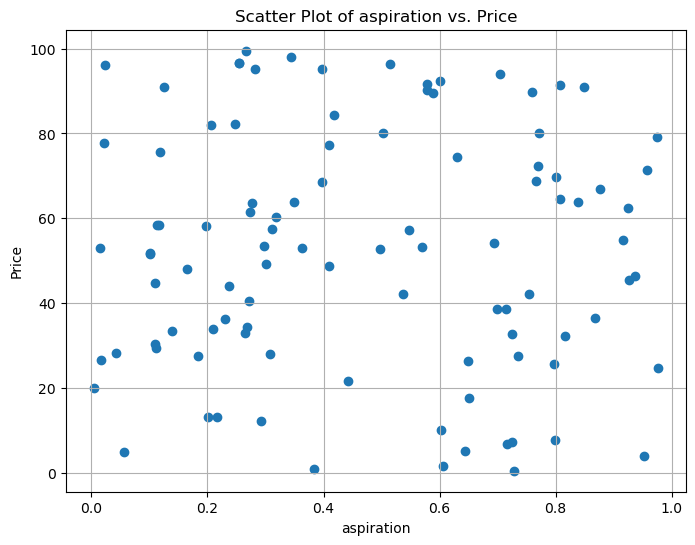

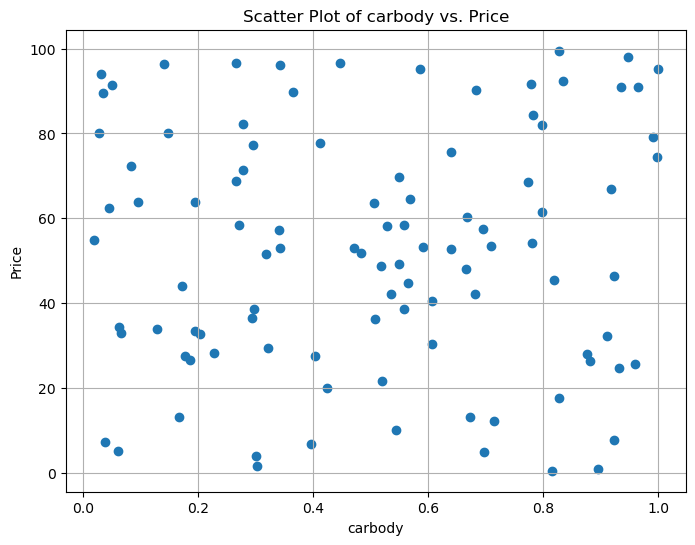

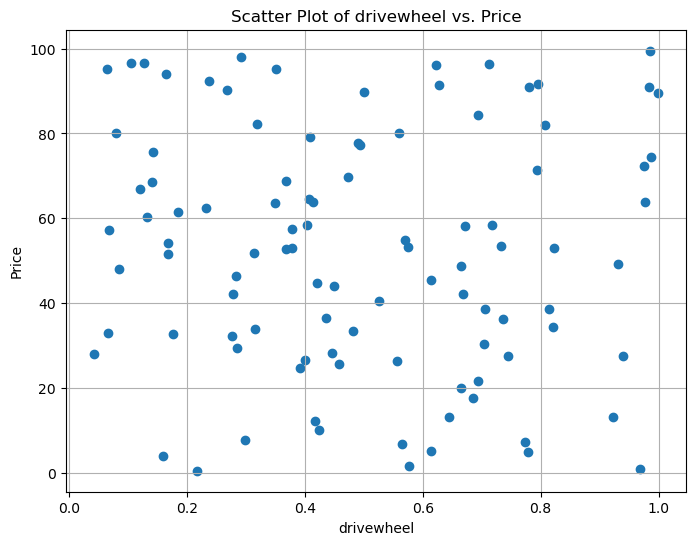

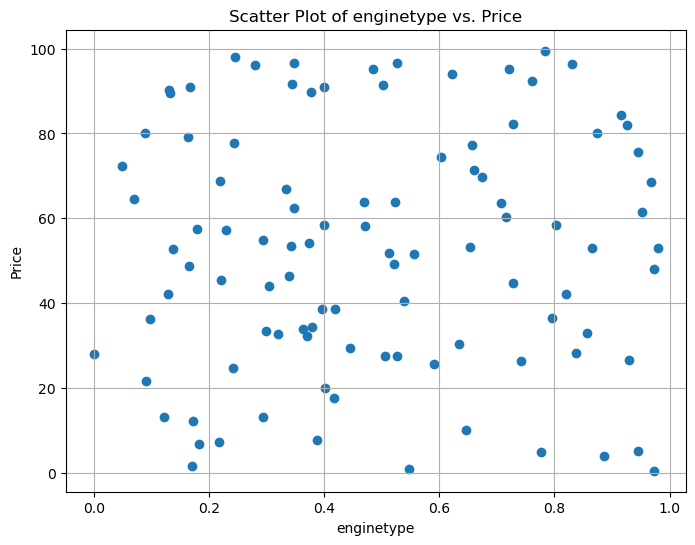

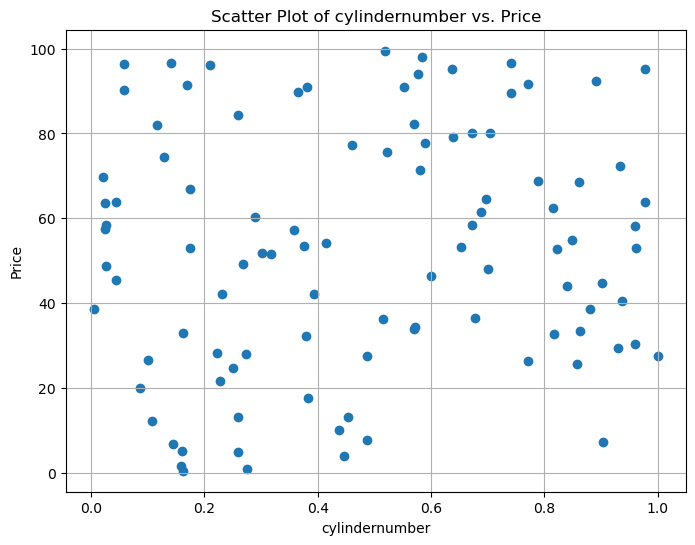

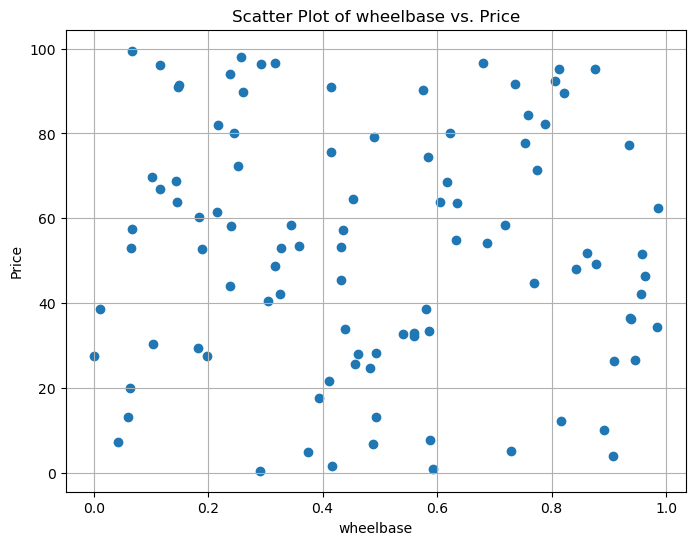

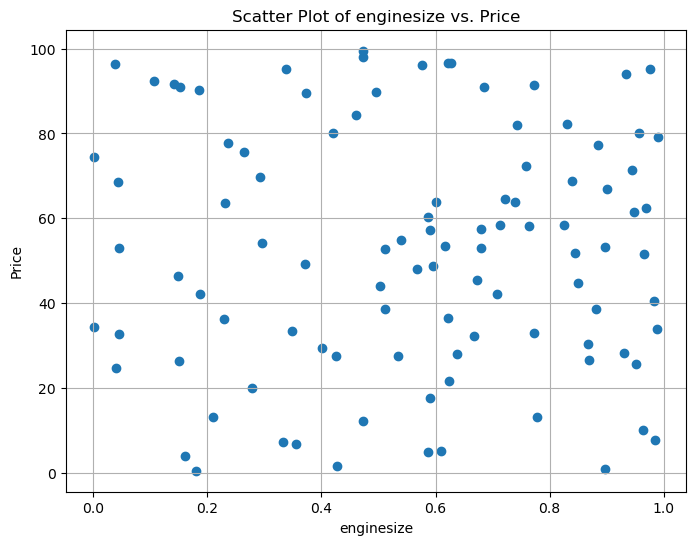

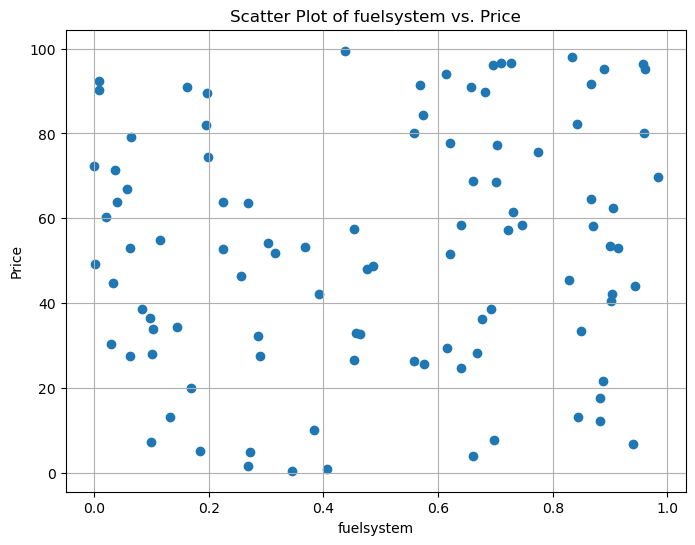

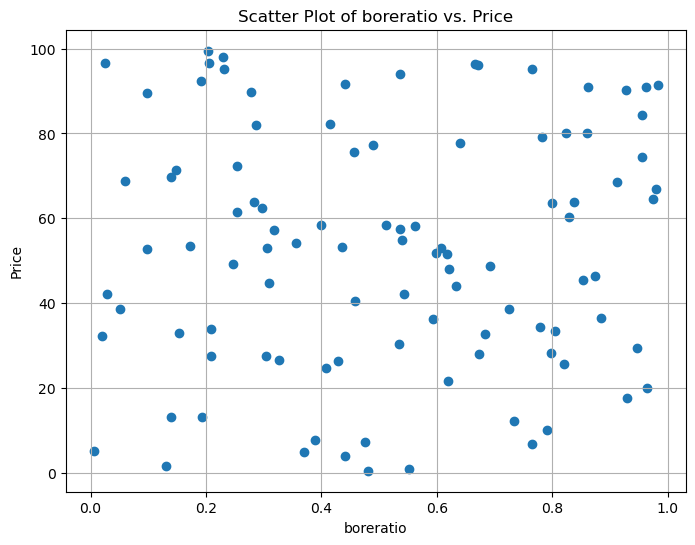

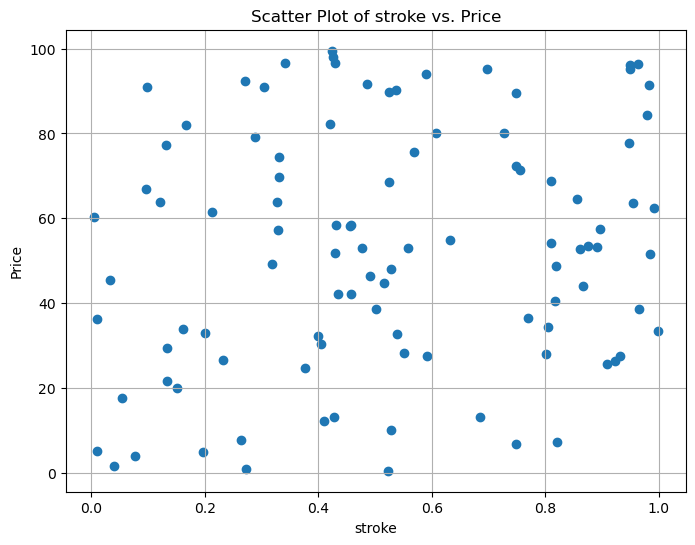

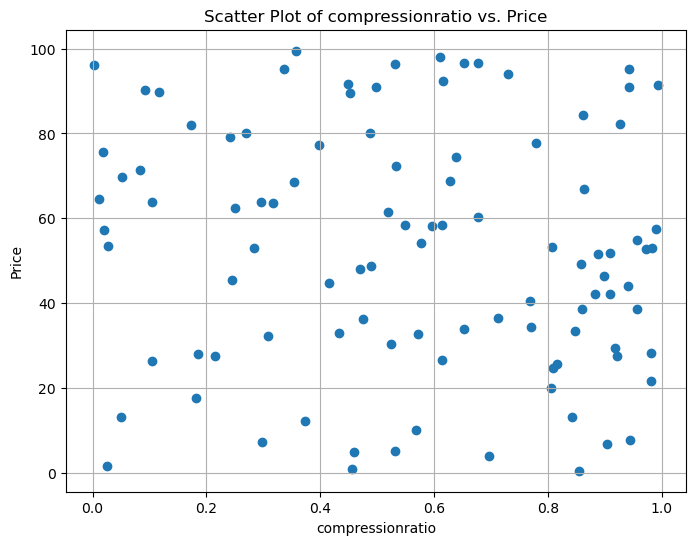

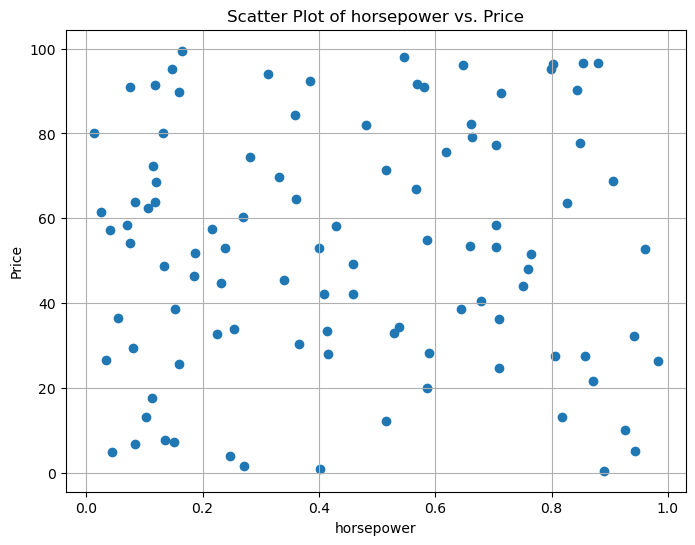

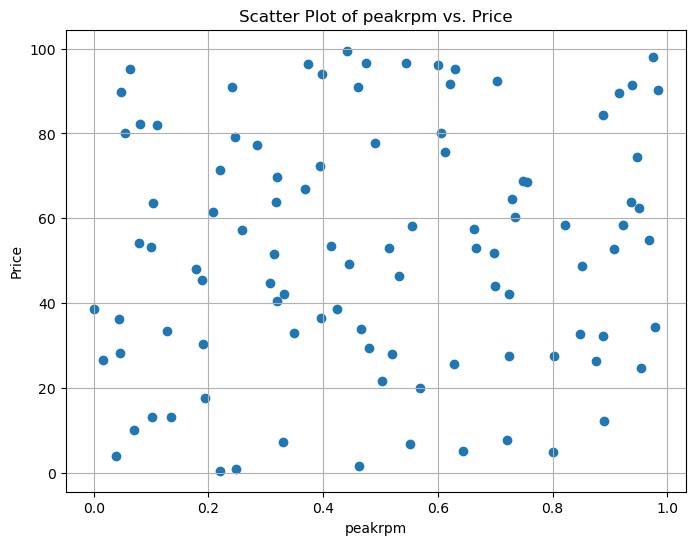

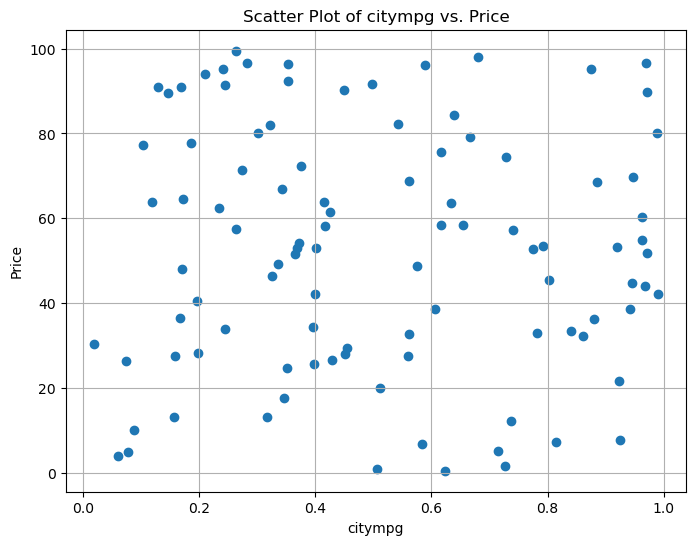

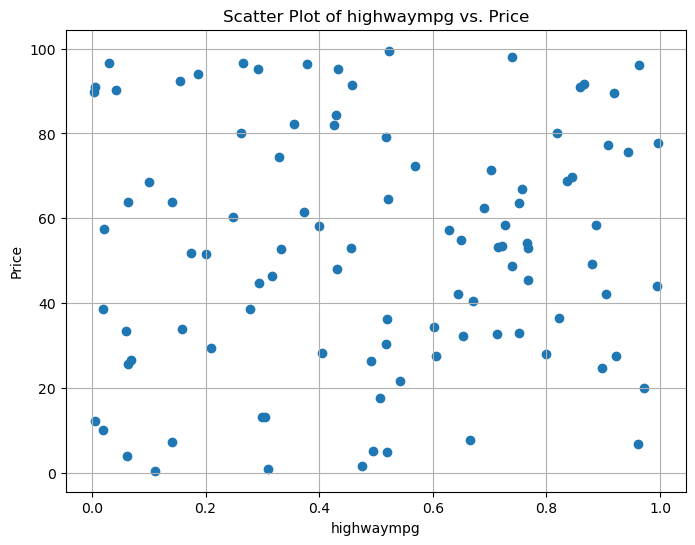

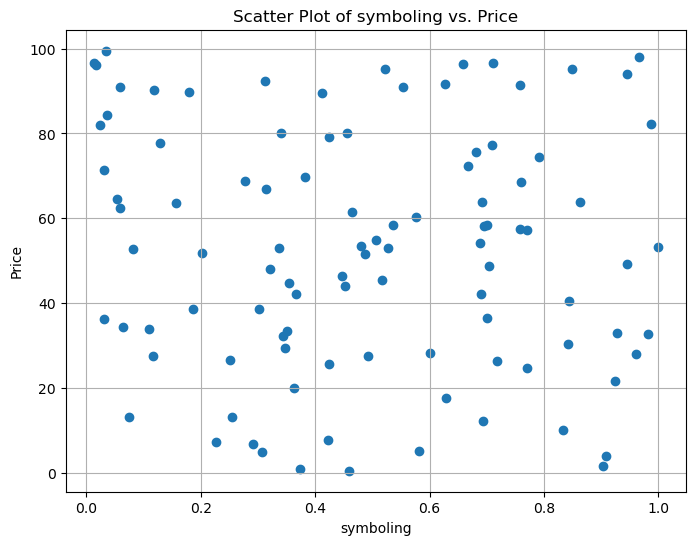

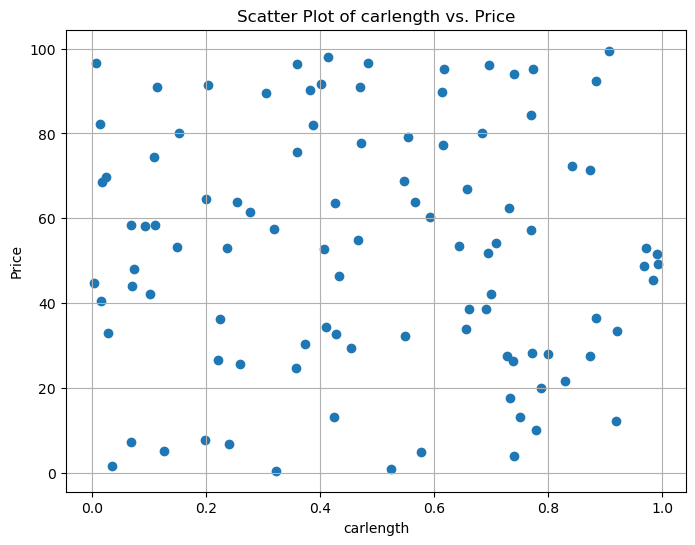

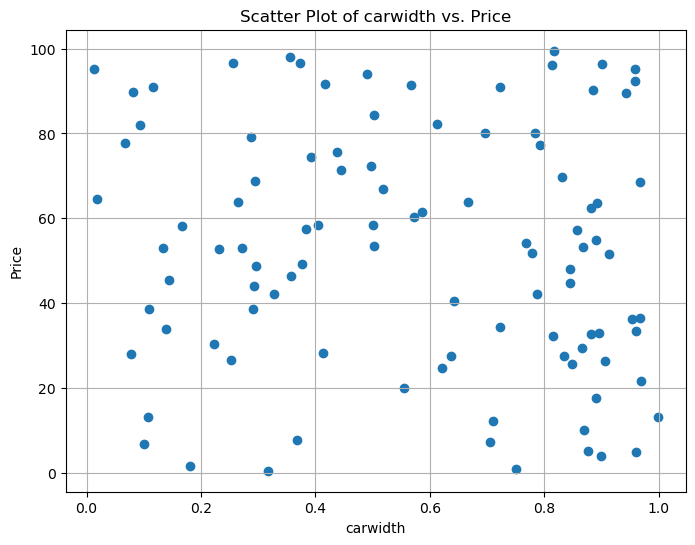

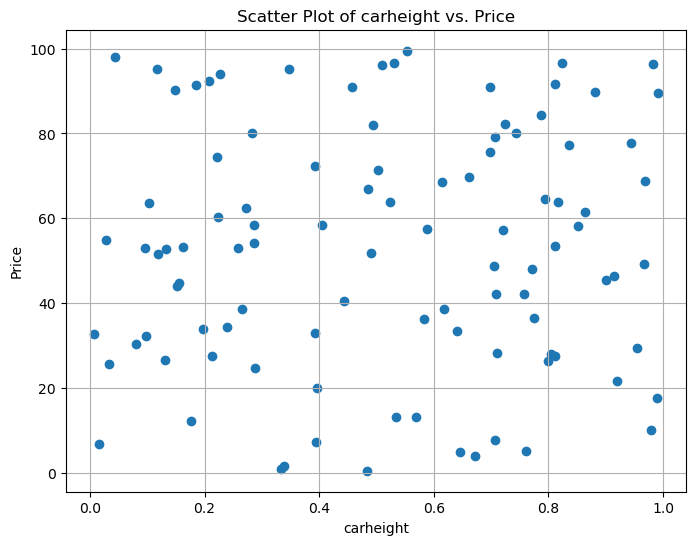

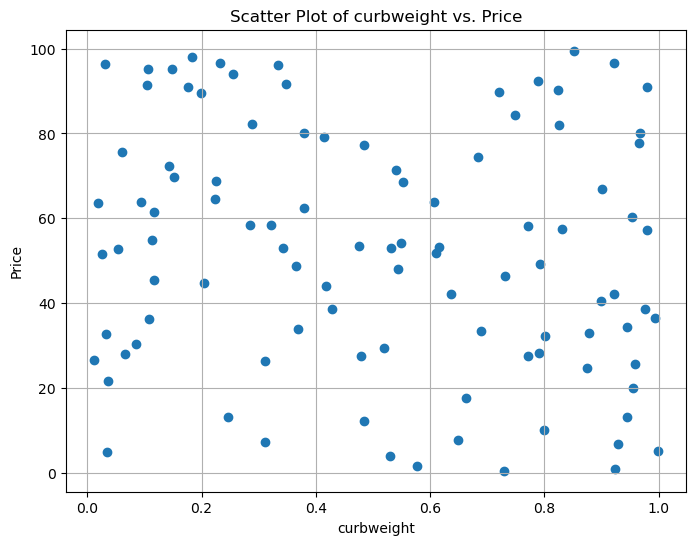

In [4]:
feature_names = ['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'wheelbase', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling', 'carlength', 'carwidth', 'carheight', 'curbweight']
np.random.seed(0)
X = pd.DataFrame(np.random.rand(100, len(feature_names)), columns=feature_names)
Y = pd.Series(np.random.rand(100) * 100)

# Create scatter plots for each independent variable against the dependent variable
for column in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[column], Y)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot of {column} vs. Price')
    plt.grid(True)
    plt.show()

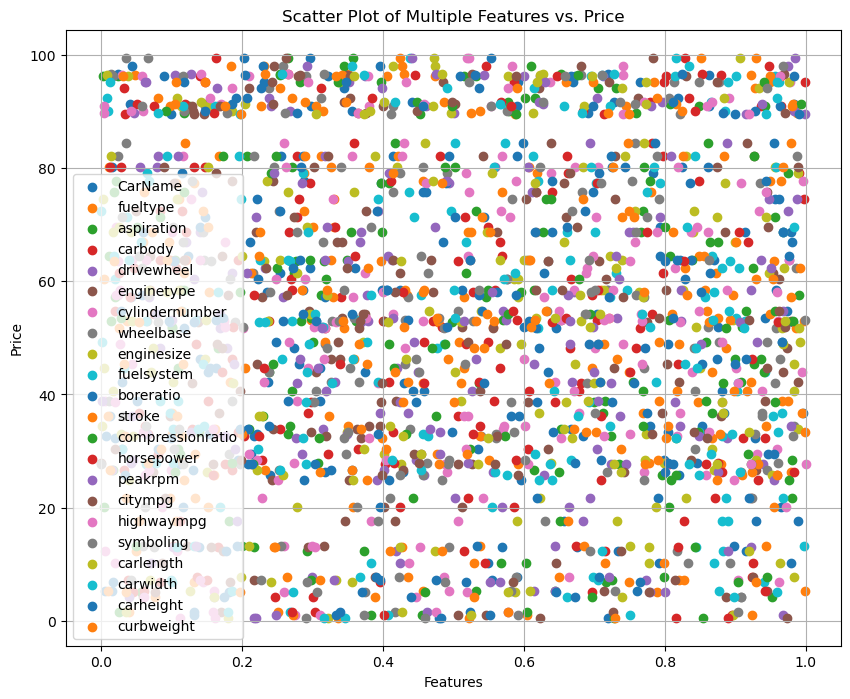

In [6]:
np.random.seed(0)
X = pd.DataFrame(np.random.rand(100, len(feature_names)), columns=feature_names)
Y = pd.Series(np.random.rand(100) * 100)

# Create scatter plot for multiple features against the dependent variable
plt.figure(figsize=(10, 8))
for column in X.columns:
    plt.scatter(X[column], Y, label=column)

plt.xlabel('Features')
plt.ylabel('Price')
plt.title('Scatter Plot of Multiple Features vs. Price')
plt.legend()
plt.grid(True)
plt.show()

Train Our Data With train_test_split Function

In [233]:
Xtrain,Xtest,ytrain,ytest = train_test_split(x,y,test_size=0.4)

Fitttin Our X and Y data with LinearRegression Function

In [225]:
clf = LinearRegression()
clf.fit(Xtrain,ytrain)

LinearRegression()

Get Xtrain Data

In [236]:
Xtrain

,CarName,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,wheelbase,enginesize,fuelsystem,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling,carlength,carwidth,carheight,curbweight
44,45,1,0,3,1,3,2,94.5,90,1,...,9.6,70,5400,38,43,1,155.9,63.6,52.0,1874
80,66,1,1,2,1,3,2,96.3,110,6,...,7.5,116,5500,23,30,3,173.0,65.4,49.4,2370
188,132,1,0,3,1,3,2,97.3,109,5,...,10.0,100,5500,26,32,2,171.7,65.5,55.7,2300
38,41,1,0,2,1,3,2,96.5,110,0,...,9.0,86,5800,27,33,0,167.5,65.2,53.3,2289
85,67,1,0,3,1,3,2,96.3,122,1,...,8.5,88,5000,25,32,1,172.4,65.4,51.6,2365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,97,1,0,2,2,1,0,98.4,203,5,...,10.0,288,5750,17,28,1,175.7,72.3,50.5,3366
194,139,1,0,3,2,3,2,104.3,141,5,...,9.5,114,5400,23,28,-2,188.8,67.2,56.2,2912
157,116,1,0,2,1,3,2,95.7,98,1,...,9.0,70,4800,30,37,0,166.3,64.4,52.8,2109
102,72,1,0,4,1,5,3,100.4,181,5,...,9.0,152,5200,17,22,0,184.6,66.5,56.1,3296


Xtrain Predictive Data

In [237]:
clf.predict(Xtrain)

array([[ 5605.24817883],
       [ 9822.89301002],
       [ 9182.39460422],
       [11918.95807387],
       [ 8859.00483496],
       [22799.43661627],
       [ 6565.23855596],
       [ 6741.58980624],
       [ 5797.07810176],
       [17797.90108734],
       [ 6721.39739082],
       [10449.5354101 ],
       [18574.80181234],
       [ 5298.07769887],
       [ 5929.48520082],
       [12994.93505452],
       [ 4620.01307111],
       [14055.99883164],
       [ 4556.99808345],
       [16369.40365228],
       [14910.52923776],
       [ 7516.99592486],
       [18719.5061042 ],
       [17844.84547415],
       [23367.06935977],
       [ 4513.49950896],
       [11276.930142  ],
       [42632.85631567],
       [17297.29347714],
       [ 6053.70118675],
       [11286.88800513],
       [ 9189.79321427],
       [ 8064.67418547],
       [ 8421.78071314],
       [17747.3766602 ],
       [14485.28342656],
       [ 7570.41626855],
       [ 5262.89468051],
       [29562.27346336],
       [ 9672.43101013],


Get Xtest Data

In [242]:
Xtest

,CarName,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,wheelbase,enginesize,fuelsystem,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling,carlength,carwidth,carheight,curbweight
55,53,1,0,2,2,6,6,95.3,70,2,...,9.4,101,6000,17,23,3,169.0,65.7,49.6,2380
18,24,1,0,2,1,2,4,88.4,61,1,...,9.5,48,5100,47,53,2,141.1,60.3,53.2,1488
99,81,1,0,2,1,3,2,97.2,120,1,...,8.5,97,5200,27,34,0,173.4,65.2,54.7,2324
178,118,1,0,2,2,0,3,102.9,171,5,...,9.3,161,5200,20,24,3,183.5,67.7,52.0,2976
197,141,1,0,4,2,3,2,104.3,141,5,...,9.5,114,5400,24,28,-1,188.8,67.2,57.5,3042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,90,1,1,2,2,3,2,95.9,156,6,...,7.0,145,5000,19,24,3,173.2,66.3,50.2,2818
173,115,1,0,3,1,3,2,102.4,122,5,...,8.7,92,4200,29,34,-1,175.6,66.5,54.9,2326
15,13,1,0,3,2,3,3,103.5,209,5,...,8.0,182,5400,16,22,0,189.0,66.9,55.7,3230
81,63,1,0,2,1,3,2,96.3,122,1,...,8.5,88,5000,25,32,3,173.0,65.4,49.4,2328


Xtest Predictive Data

In [243]:
clf.predict(Xtest)

array([[ 9067.09042602],
       [ 1253.32591481],
       [12086.07762368],
       [17572.41247405],
       [17400.70878289],
       [ 5436.06134223],
       [16647.02570451],
       [ 9804.12652098],
       [18688.32666166],
       [17866.08274795],
       [ 8456.65046933],
       [ 6155.30749397],
       [41980.13904502],
       [ 8300.71084202],
       [ 8639.84465439],
       [12383.23539289],
       [ 8366.74267383],
       [ 6887.20154881],
       [13383.69857509],
       [17682.10038212],
       [18618.98360124],
       [18507.98950104],
       [23155.98884835],
       [16644.62576356],
       [13519.85199506],
       [16054.54528977],
       [ 8006.31067409],
       [ 8944.36764662],
       [ 8305.82452829],
       [19963.86460489],
       [18608.82852264],
       [27764.3882156 ],
       [20132.84918694],
       [ 8443.70029454],
       [ 4211.85624209],
       [13570.43043356],
       [15407.06796232],
       [16102.39578411],
       [26004.18865522],
       [ 8246.27068991],


Check Our Modle Accuracy

In [244]:
clf.score(Xtest,ytest)

0.905441006233598

KeyError: 'new_x'

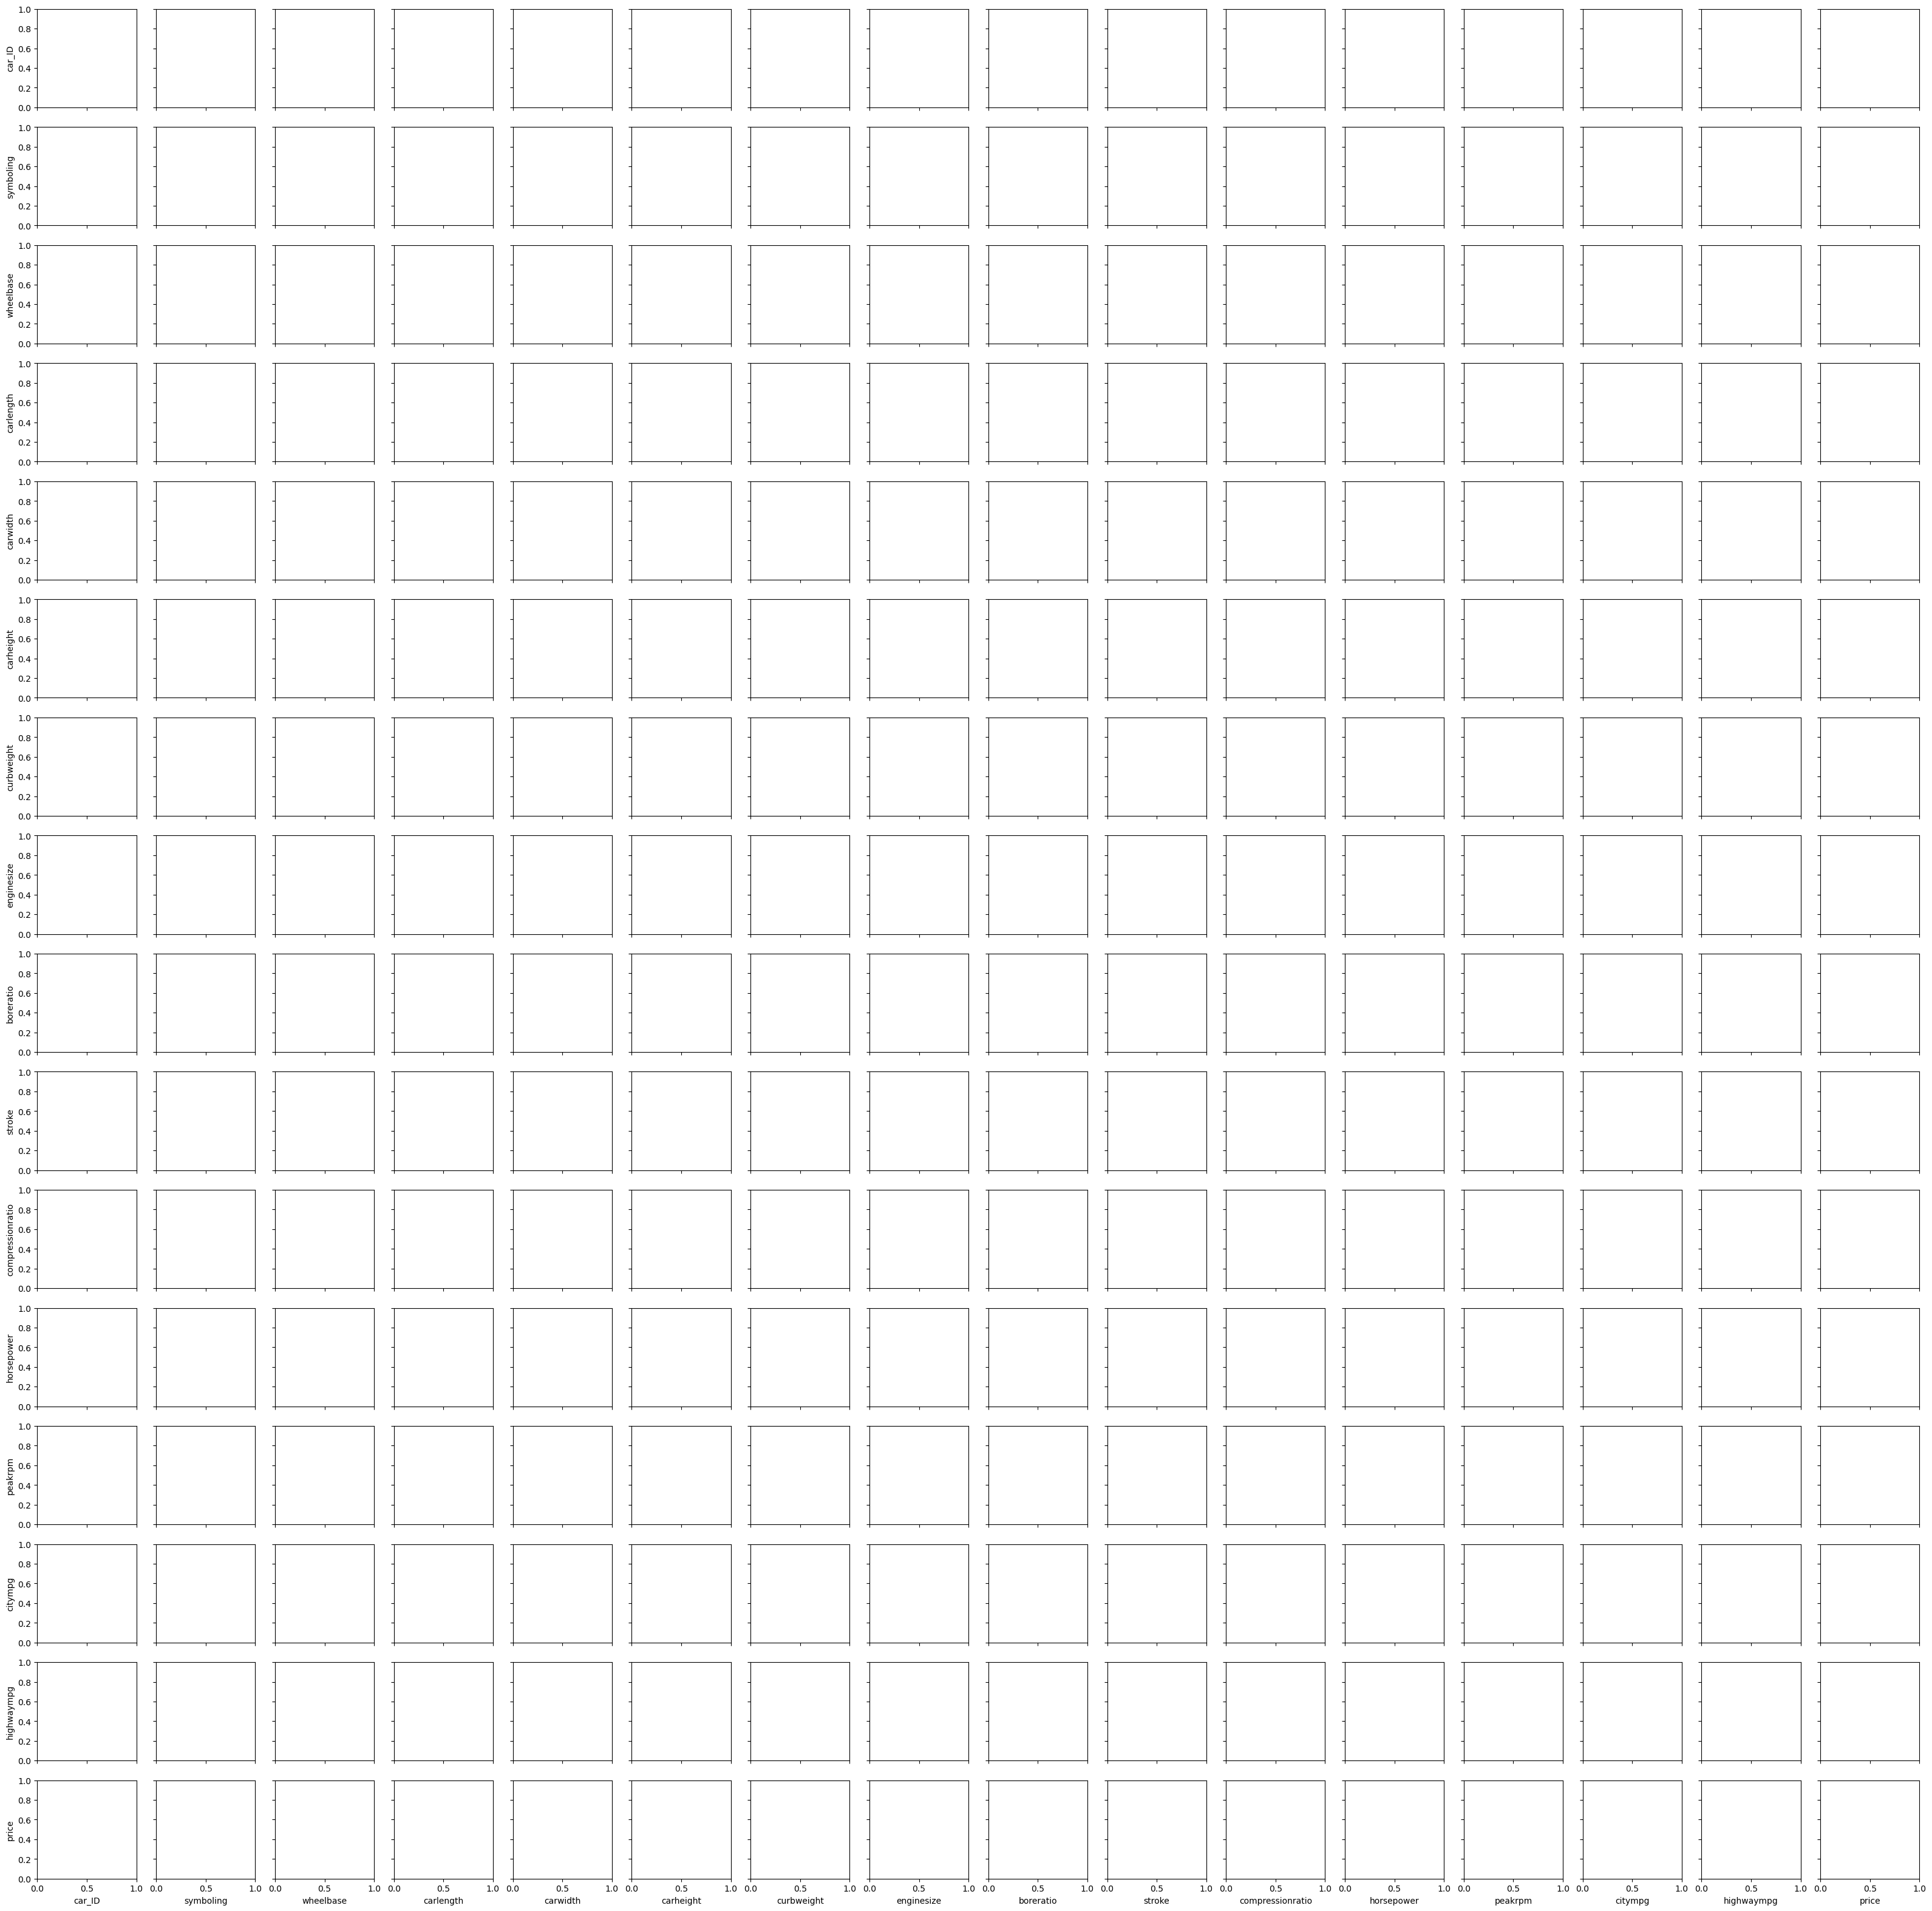

In [8]:
sns.pairplot(df,hue='new_x')